# Scenario 1: Money at a fixed rate for an unsecured purchase


In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
from fredapi import Fred
from pandas_datareader.data import DataReader as reader
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fred = Fred(api_key='407ea0f14a50e117e2d8316e35ad7ffe')

start_date = datetime(1990, 1, 1)
end_date = datetime.today()

In [3]:
df = reader(['TOTALSL', 'DRCCLACBS', 'FEDFUNDS'], 'fred', start_date, end_date).reset_index()
df.head(15)

,DATE,TOTALSL,DRCCLACBS,FEDFUNDS
0,1990-01-01,797.71486,NaN,8.23
1,1990-02-01,798.77319,NaN,8.24
2,1990-03-01,798.74809,NaN,8.28
3,1990-04-01,798.74701,NaN,8.26
4,1990-05-01,799.75103,NaN,8.18
5,1990-06-01,802.89274,NaN,8.29
6,1990-07-01,806.88750,NaN,8.15
7,1990-08-01,808.75857,NaN,8.13
8,1990-09-01,810.43623,NaN,8.20
9,1990-10-01,812.65511,NaN,8.11


In [4]:
df.dropna(inplace=True)

In [5]:
df = df.rename(columns={'DATE': 'Date'})
df['ConsumerCredit_PctChg'] = df['TOTALSL'].pct_change()
df['DefaultRate_PctChg'] = df['DRCCLACBS'].pct_change()
df.head()

,Date,TOTALSL,DRCCLACBS,FEDFUNDS,ConsumerCredit_PctChg,DefaultRate_PctChg
12,1991-01-01,806.60050,5.26,6.91,NaN,NaN
15,1991-04-01,807.81895,5.48,5.91,0.001511,0.041825
18,1991-07-01,804.02756,5.35,5.82,-0.004693,-0.023723
21,1991-10-01,798.61698,5.32,5.21,-0.006729,-0.005607
24,1992-01-01,798.98271,5.27,4.03,0.000458,-0.009398


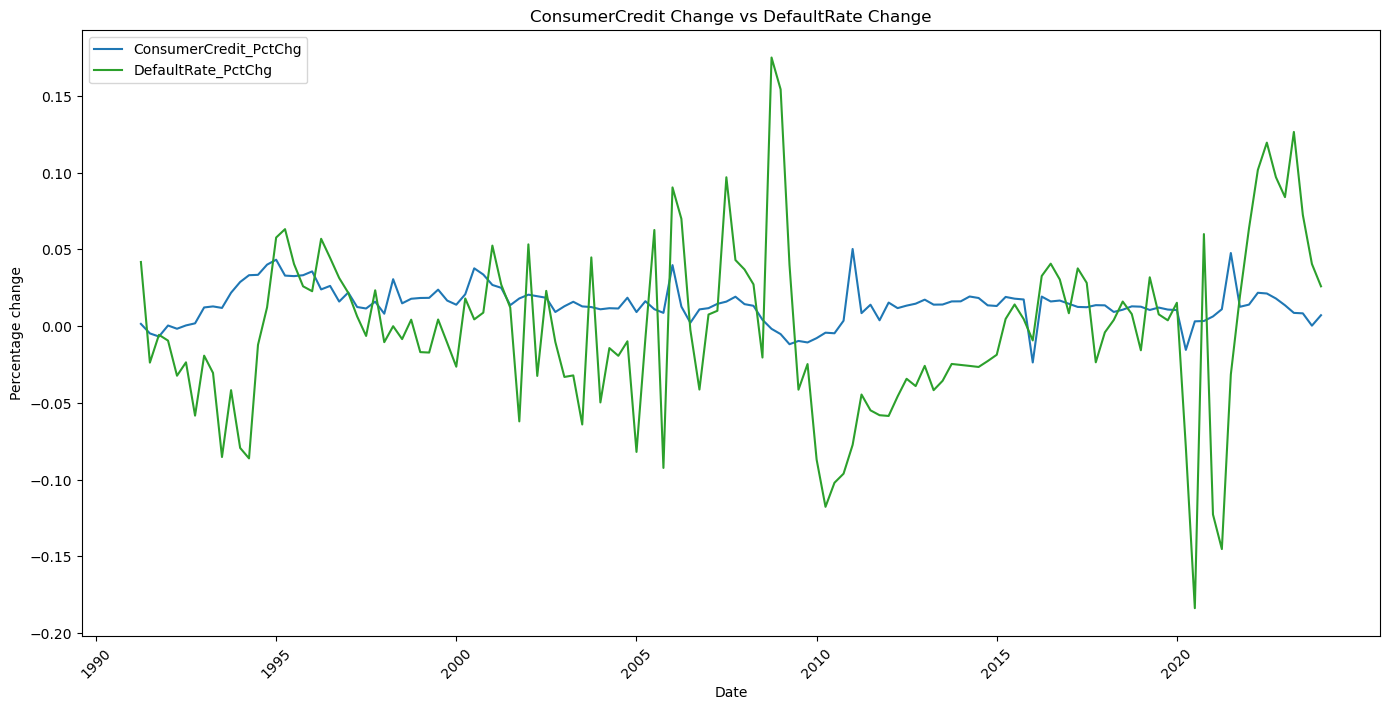

In [6]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(14, 7))  # Adjust the size as needed

# Plot interest rate and default rate on the left y-axis
ax1.plot(df['Date'], df['ConsumerCredit_PctChg'], color='tab:blue', label='ConsumerCredit_PctChg')
ax1.plot(df['Date'], df['DefaultRate_PctChg'], color='tab:green', label='DefaultRate_PctChg')
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage change', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Set x-axis major ticks to every 5 years starting from the nearest multiple of 5
start_year = df['Date'].min().year
end_year = df['Date'].max().year

start_year = (start_year // 5) * 5
years = pd.date_range(start=f'{start_year}', end=f'{end_year}', freq='5YS')
ax1.set_xticks(years)
ax1.set_xticklabels([year.year for year in years])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legends
fig.tight_layout()
ax1.legend(loc='upper left')

# Show plot
plt.title('ConsumerCredit Change vs DefaultRate Change')
plt.show()

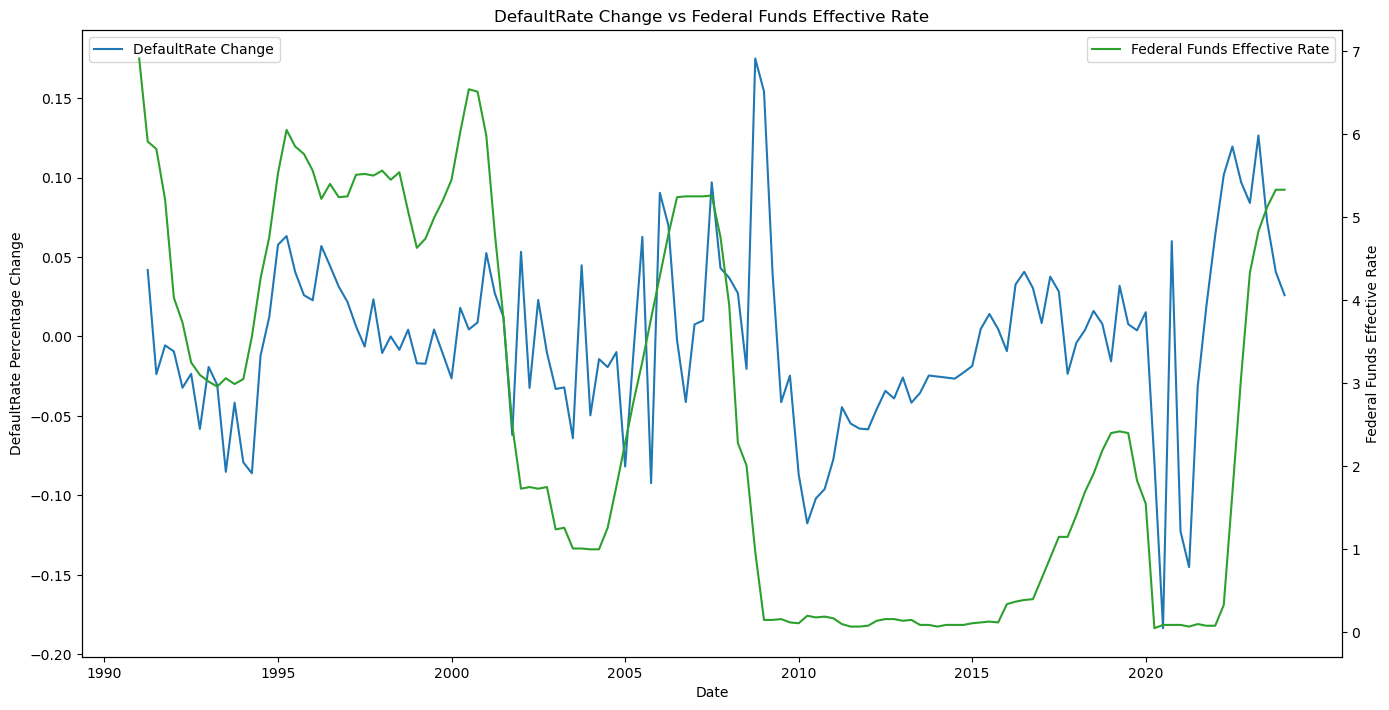

In [7]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(14, 7))  # Adjust the size as needed

# Plot interest rate and default rate on the left y-axis
ax1.plot(df['Date'], df['DefaultRate_PctChg'], color='tab:blue', label='DefaultRate Change')
ax1.set_xlabel('Date')
ax1.set_ylabel('DefaultRate Percentage Change', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['FEDFUNDS'], color='tab:green', label='Federal Funds Effective Rate')
ax2.set_ylabel('Federal Funds Effective Rate', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Set x-axis major ticks to every 5 years starting from the nearest multiple of 5
start_year = df['Date'].min().year
end_year = df['Date'].max().year

start_year = (start_year // 5) * 5
years = pd.date_range(start=f'{start_year}', end=f'{end_year}', freq='5YS')
ax1.set_xticks(years)
ax1.set_xticklabels([year.year for year in years])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legends
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.title('DefaultRate Change vs Federal Funds Effective Rate')
plt.show()

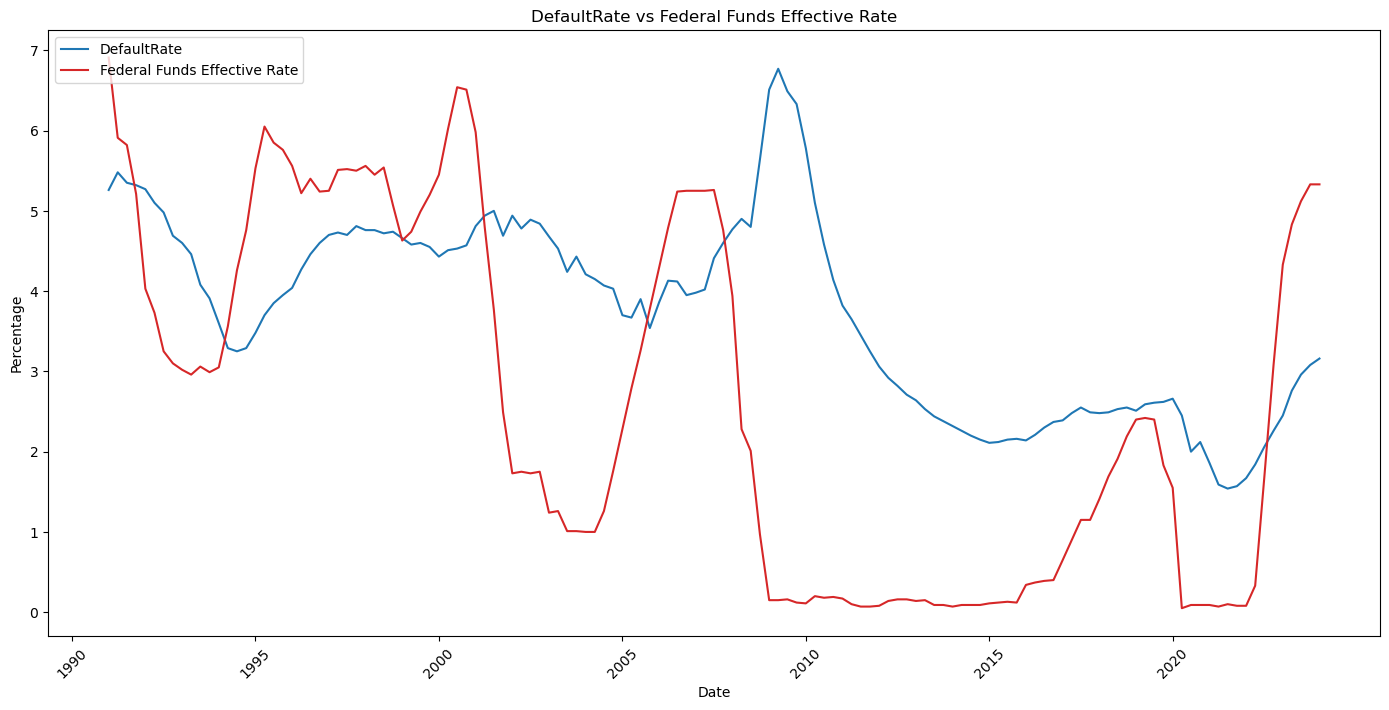

In [8]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(14, 7))  # Adjust the size as needed

# Plot interest rate and default rate on the left y-axis
ax1.plot(df['Date'], df['DRCCLACBS'], color='tab:blue', label='DefaultRate')
ax1.plot(df['Date'], df['FEDFUNDS'], color='tab:red', label='Federal Funds Effective Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Set x-axis major ticks to every 5 years starting from the nearest multiple of 5
start_year = df['Date'].min().year
end_year = df['Date'].max().year

start_year = (start_year // 5) * 5
years = pd.date_range(start=f'{start_year}', end=f'{end_year}', freq='5YS')
ax1.set_xticks(years)
ax1.set_xticklabels([year.year for year in years])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legends
fig.tight_layout()
ax1.legend(loc='upper left')

# Show plot
plt.title('DefaultRate vs Federal Funds Effective Rate')
plt.show()

# Scenario 2: Money at a floating rate for a secured purchase

In [9]:
df = reader(['OBMMIC30YFLVGT80FLT680', 'HOUST', 'DRSFRMACBS', 'MORTGAGE30US', 'FEDFUNDS'], 'fred', start_date, end_date).reset_index()
house_data_df = pd.read_csv('house_data.csv')
df.head()

,DATE,OBMMIC30YFLVGT80FLT680,HOUST,DRSFRMACBS,MORTGAGE30US,FEDFUNDS
0,1990-01-01,NaN,1551.0,NaN,NaN,8.23
1,1990-01-05,NaN,NaN,NaN,9.83,NaN
2,1990-01-12,NaN,NaN,NaN,9.80,NaN
3,1990-01-19,NaN,NaN,NaN,9.90,NaN
4,1990-01-26,NaN,NaN,NaN,10.05,NaN


In [10]:
house_data_df = house_data_df[house_data_df.columns[8:]].mean().reset_index().rename(columns={'index': 'Date', 0: 'ZHVI Avg Value'})
house_data_df['Date'] = pd.to_datetime(house_data_df['Date'], format='%Y/%m/%d')

In [11]:
df = df.rename(columns={'DATE': 'Date'})

In [12]:
mortgage_rate_df = df[['Date', 'MORTGAGE30US']].dropna()

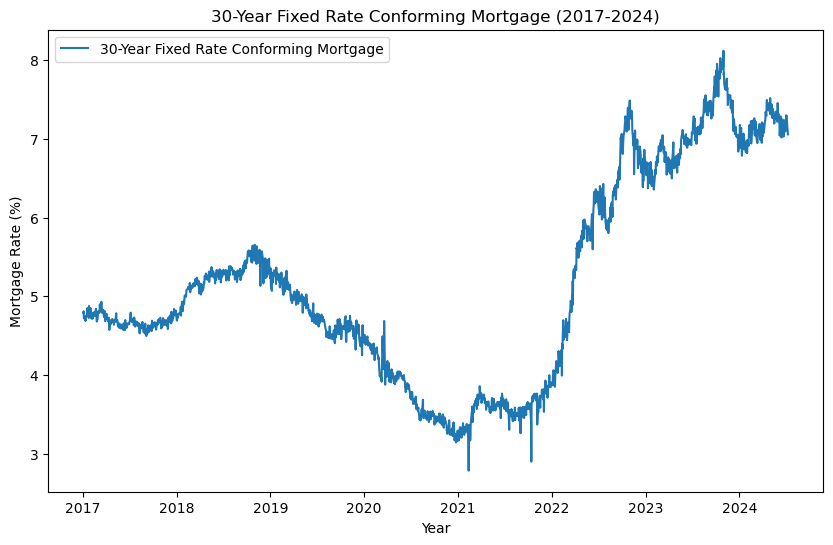

In [13]:
LTV_Rate = df[['Date', 'OBMMIC30YFLVGT80FLT680']].dropna()

plt.figure(figsize=(10, 6))
plt.plot(LTV_Rate['Date'], LTV_Rate['OBMMIC30YFLVGT80FLT680'], label='30-Year Fixed Rate Conforming Mortgage')
plt.title('30-Year Fixed Rate Conforming Mortgage (2017-2024)')
plt.xlabel('Year')
plt.ylabel('Mortgage Rate (%)')
plt.legend()
plt.show()

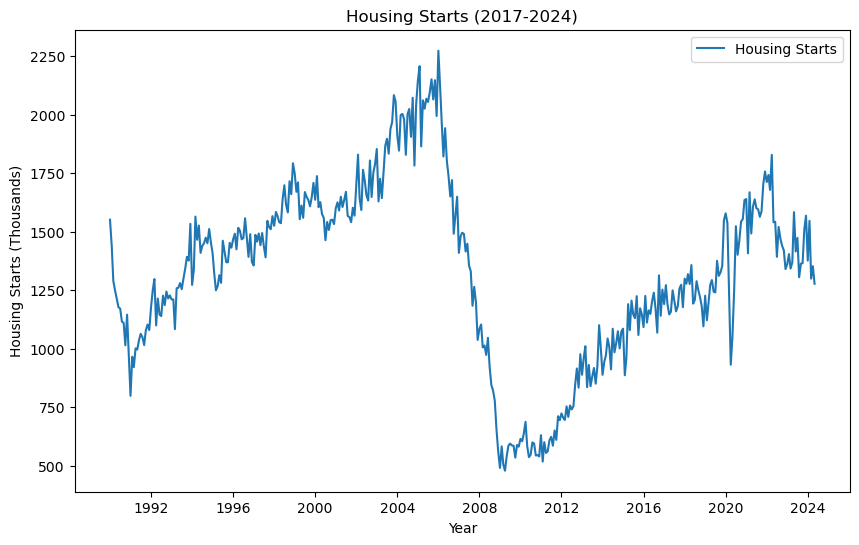

In [14]:
Houst = df[['Date', 'HOUST']].dropna()

plt.figure(figsize=(10, 6))
plt.plot(Houst['Date'], Houst['HOUST'], label='Housing Starts')
plt.title('Housing Starts (2017-2024)')
plt.xlabel('Year')
plt.ylabel('Housing Starts (Thousands)')
plt.legend()
plt.show()

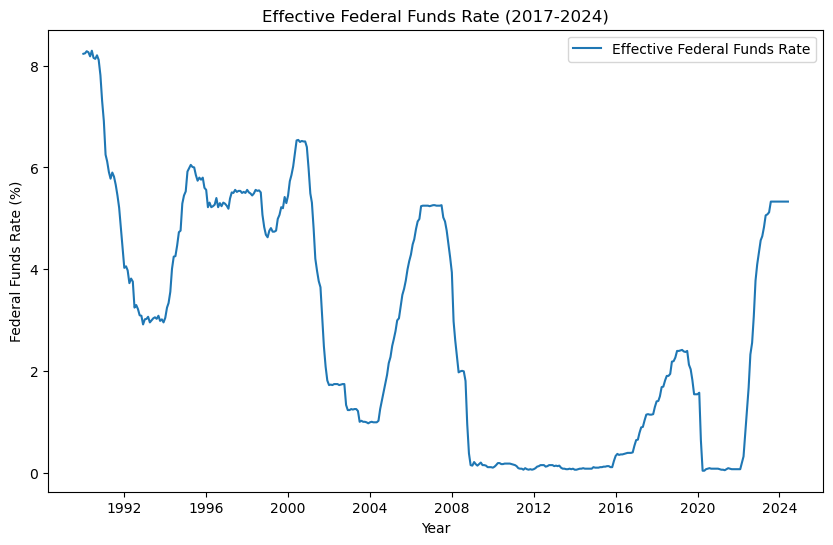

In [15]:
fed = df[['Date', 'FEDFUNDS']].dropna()

plt.figure(figsize=(10, 6))
plt.plot(fed['Date'], fed['FEDFUNDS'], label='Effective Federal Funds Rate')
plt.title('Effective Federal Funds Rate (2017-2024)')
plt.xlabel('Year')
plt.ylabel('Federal Funds Rate (%)')
plt.legend()
plt.show()

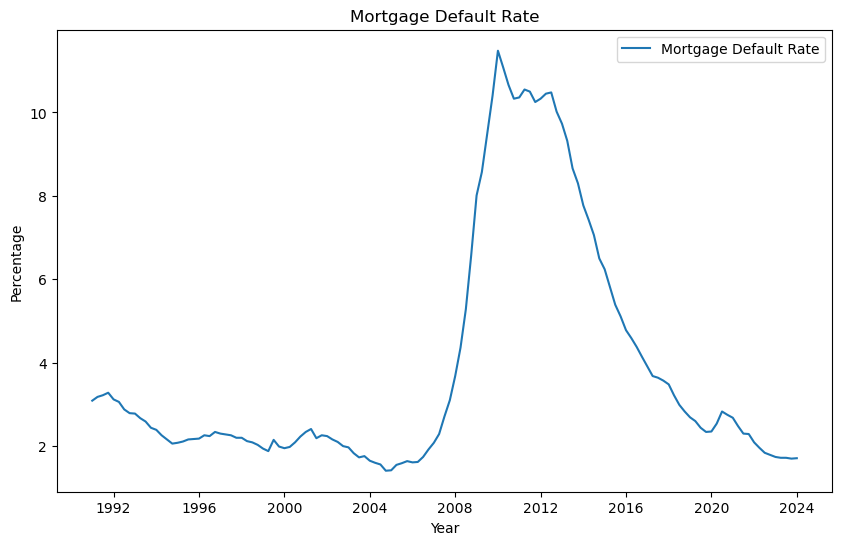

In [16]:
def_rate = df[['Date', 'DRSFRMACBS']].dropna()

plt.figure(figsize=(10, 6))
plt.plot(def_rate['Date'], def_rate['DRSFRMACBS'], label='Mortgage Default Rate')
plt.title('Mortgage Default Rate')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.show()

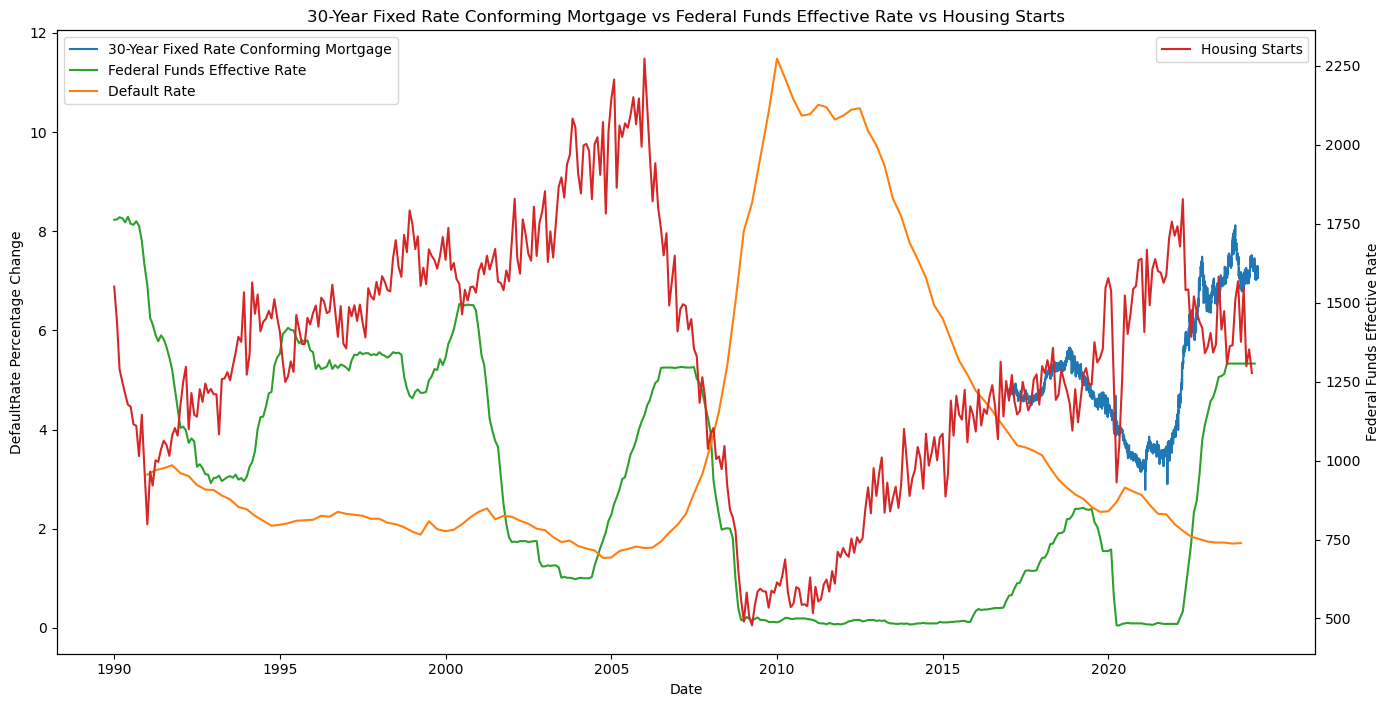

In [17]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(14, 7))  # Adjust the size as needed

# Plot interest rate and default rate on the left y-axis
ax1.plot(LTV_Rate['Date'], LTV_Rate['OBMMIC30YFLVGT80FLT680'], color='tab:blue', label='30-Year Fixed Rate Conforming Mortgage')
ax1.plot(fed['Date'], fed['FEDFUNDS'], color='tab:green', label='Federal Funds Effective Rate')
ax1.plot(def_rate['Date'], def_rate['DRSFRMACBS'], color='tab:orange', label='Default Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('DefaultRate Percentage Change', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.plot(Houst['Date'], Houst['HOUST'], color='tab:red', label='Housing Starts')
ax2.set_ylabel('Federal Funds Effective Rate', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Set x-axis major ticks to every 5 years starting from the nearest multiple of 5
start_year = df['Date'].min().year
end_year = df['Date'].max().year

start_year = (start_year // 2) * 2
years = pd.date_range(start=f'{start_year}', end=f'{end_year}', freq='5YS')
ax1.set_xticks(years)
ax1.set_xticklabels([year.year for year in years])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legends
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.title('30-Year Fixed Rate Conforming Mortgage vs Federal Funds Effective Rate vs Housing Starts')
plt.show()

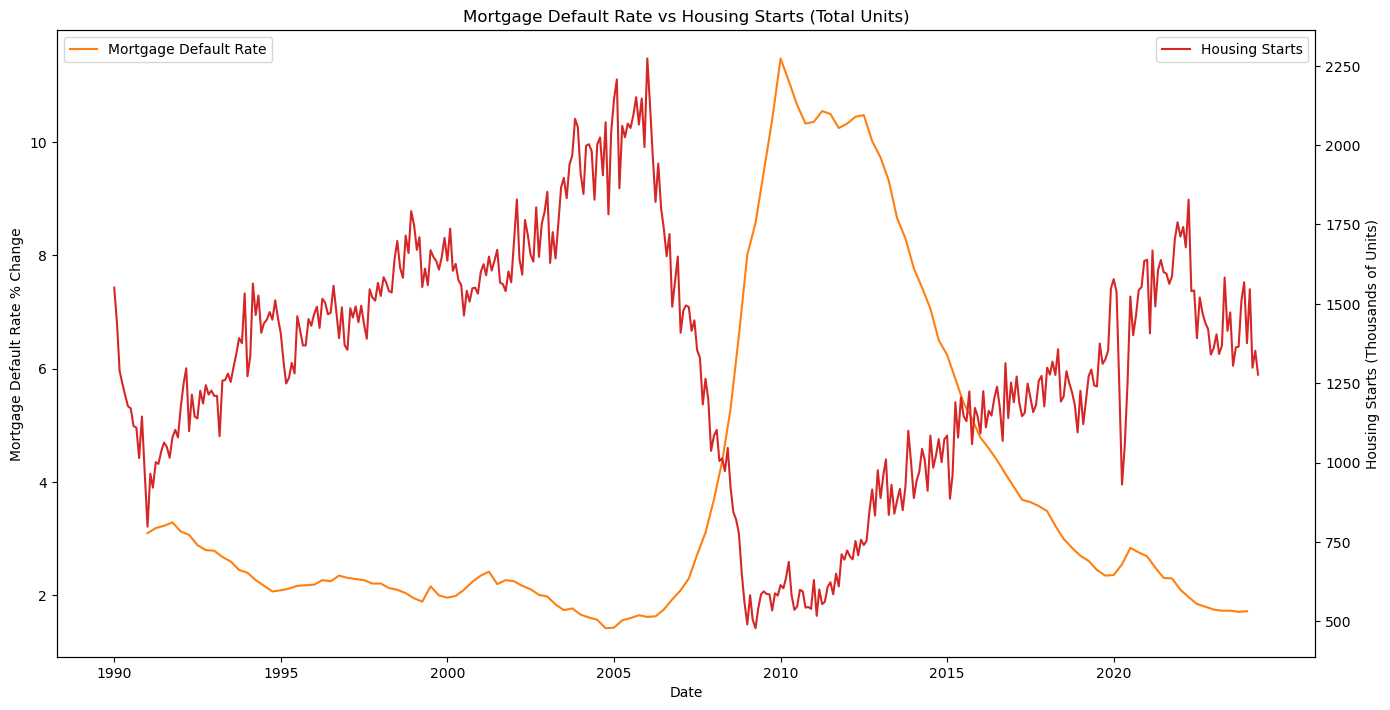

In [18]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(14, 7))  # Adjust the size as needed

# Plot interest rate and default rate on the left y-axis
ax1.plot(def_rate['Date'], def_rate['DRSFRMACBS'], color='tab:orange', label='Mortgage Default Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mortgage Default Rate % Change', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.plot(Houst['Date'], Houst['HOUST'], color='tab:red', label='Housing Starts')
ax2.set_ylabel('Housing Starts (Thousands of Units)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Set x-axis major ticks to every 5 years starting from the nearest multiple of 5
start_year = max(def_rate['Date'].min().year, Houst['Date'].min().year)
end_year = max(def_rate['Date'].max().year, Houst['Date'].max().year)

start_year = (start_year // 2) * 2
years = pd.date_range(start=f'{start_year}', end=f'{end_year}', freq='5YS')
ax1.set_xticks(years)
ax1.set_xticklabels([year.year for year in years])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legends
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.title('Mortgage Default Rate vs Housing Starts (Total Units)')
plt.show()

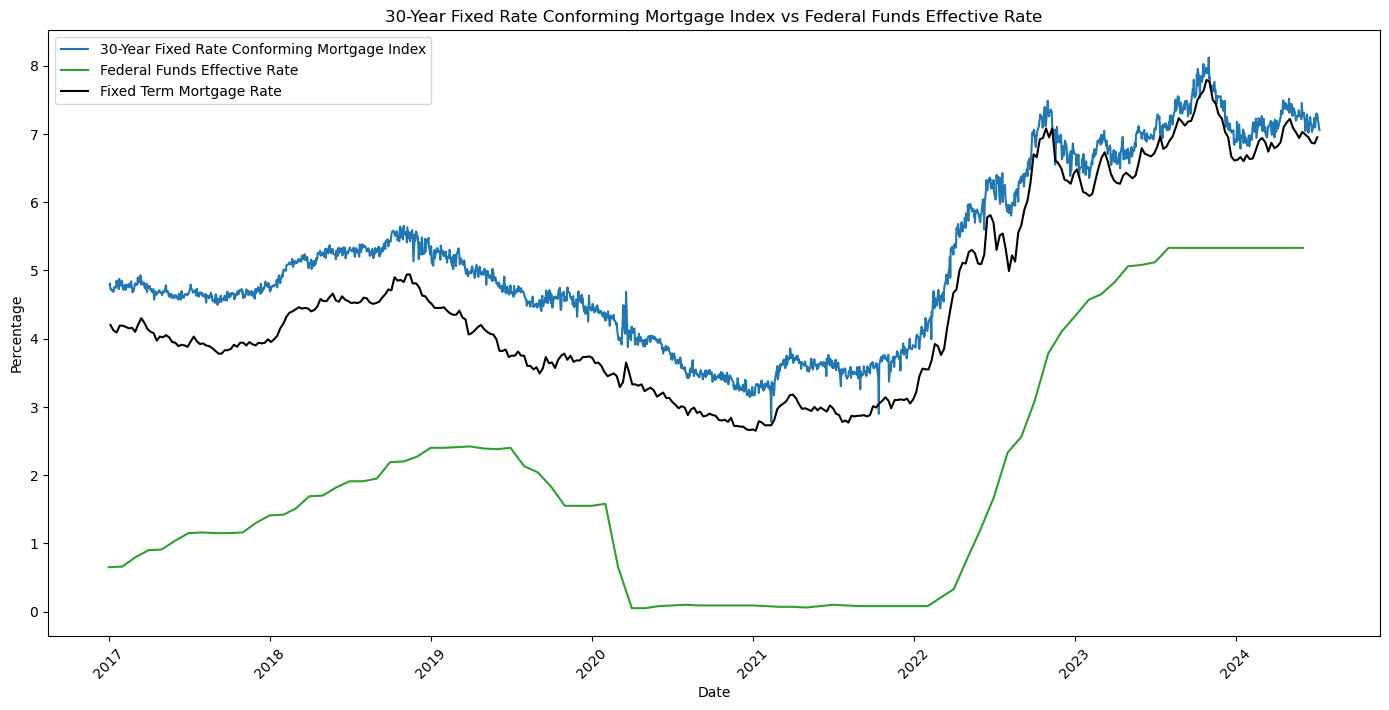

In [19]:
fed = fed[fed['Date'] >= '2017-01-01']
house_data_df = house_data_df[house_data_df['Date'] >= '2017-01-01']
mortgage_rate_df = mortgage_rate_df[mortgage_rate_df['Date'] >= '2017-01-01']

# Set the figure size
fig, ax1 = plt.subplots(figsize=(14, 7))  # Adjust the size as needed

# Plot interest rate and default rate on the left y-axis
ax1.plot(LTV_Rate['Date'], LTV_Rate['OBMMIC30YFLVGT80FLT680'], color='tab:blue', label='30-Year Fixed Rate Conforming Mortgage Index')
ax1.plot(fed['Date'], fed['FEDFUNDS'], color='tab:green', label='Federal Funds Effective Rate')
ax1.plot(mortgage_rate_df['Date'], mortgage_rate_df['MORTGAGE30US'], color='black', label='Fixed Term Mortgage Rate')


ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Set x-axis major ticks to every 5 years starting from the nearest multiple of 5
start_year = max(LTV_Rate['Date'].min().year, fed['Date'].min().year, house_data_df['Date'].min().year)
end_year = max(LTV_Rate['Date'].max().year, fed['Date'].max().year, house_data_df['Date'].max().year)

years = pd.date_range(start=f'{start_year}', end=f'{end_year}', freq='1YS')
ax1.set_xticks(years)
ax1.set_xticklabels([year.year for year in years])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legends
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.title('30-Year Fixed Rate Conforming Mortgage Index vs Federal Funds Effective Rate')
plt.show()

# Scenario 3: Money at a fixed rate for a business for a construction loan

In [20]:
# import relevant iibraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yfin
from IPython.display import VimeoVideo
from scipy import stats

## 3.1. Pull out 10-year dataset 

To implement the exploratory statistics for this scenario, we aim to pull out 10-year data for the financial statements of Loan-securing Real estate companies: Financial Asset value from their balanced sheet, as well as the Debt-To_Income (DTI) and Loan-To-Value (LTV) ratios of banks. The financial statements portrays the financial health of the real estate companies which in turn indicates the credit worthiness of the borrower in servicing their debts/repaying loans over the 10-year period.

In [21]:
# Load in data from FRED Economics, drop null values
import pandas_datareader.data as web    
import datetime
from fredapi import Fred

fred = Fred(api_key="4a686e78f0f4f1b2a194e90961e4c4f9")

start = datetime.datetime(2014, 5, 1)
end = datetime.datetime(2024, 5, 31)
df = web.DataReader(["QBPBSTASLNREALCONDEV", "RCMFLOBEDTIPCT50", "RCMFLOLTVPCT50"], "fred", start, end)
df = df.rename(columns={"QBPBSTASLNREALCONDEV": "Fin_Stat","RCMFLOBEDTIPCT50" : "DTI_ratio", "RCMFLOLTVPCT50" : "LTV_ratio"})
df.dropna(inplace=True)

In [22]:
df.head()

,Fin_Stat,DTI_ratio,LTV_ratio
DATE,,,
2014-07-01,230473.782,33.0,78.0
2014-10-01,238387.809,34.0,76.0
2015-01-01,246246.534,33.0,75.0
2015-04-01,256082.990,33.0,75.0
2015-07-01,266412.552,34.0,78.0


In [23]:
df.describe()

,Fin_Stat,DTI_ratio,LTV_ratio
count,38.000000,38.000000,38.000000
mean,359815.026474,35.052632,76.184211
std,72370.177593,1.754490,3.623163
min,230473.782000,32.000000,68.000000
25%,314509.906500,34.000000,75.000000
50%,355648.722500,35.000000,77.000000
75%,399499.724750,36.750000,79.000000
max,500172.216000,38.000000,80.000000


## 3.2. Visualize data

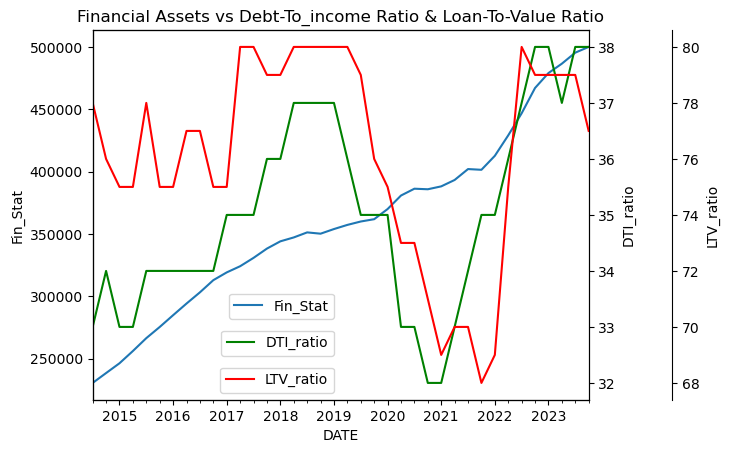

In [24]:
# Visualize data results on a graph
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Plot the data
df["2014-05-01":"2024-05-01"].plot(ax=ax1, y="Fin_Stat", legend=True)
df["2014-05-01":"2024-05-01"].plot(ax=ax2, y="DTI_ratio", legend=True, color="g")
df["2014-05-01":"2024-05-01"].plot(ax=ax3, y="LTV_ratio", legend=True, color="r")
plt.title("Financial Assets vs Debt-To_income Ratio & Loan-To-Value Ratio")

# We set the labels to the axes
ax1.set_ylabel("Fin_Stat")
ax2.set_ylabel("DTI_ratio")
ax3.set_ylabel("LTV_ratio")
ax3.spines["right"].set_position(("outward", 60))

# Set position of legends
ax1.legend(["Fin_Stat"], loc="lower right", bbox_to_anchor=(0.5, 0.2))
ax2.legend(["DTI_ratio"], loc="lower right", bbox_to_anchor=(0.5, 0.1))
ax3.legend(["LTV_ratio"], loc="lower right", bbox_to_anchor=(0.5, 0))

plt.show()

The figure above depicts that financial value of the real estate companies is on an upward trend regardless of the the economic condition of the country (from 2014 to date). On the other DTI and LTV ratios are somewhat similar; they both dipped after the 2020 but later spiked in 2021 and 2022. For clarity, we intend to explore some of the possible strategies these companies leverage to overcome the economic downturn and high inflation rates. So we decided to introduce the mortgaged-back securities asset value for the same period, and to compare with the Producer Price Index of a Building construction (representative of the inflation in the prices of buildings overtime). 

## 3.3 MBS Asset Value vs PPI of Building Constructions

In [25]:
# Load dataset within the same time period.
start = datetime.datetime(2014, 5, 1)
end = datetime.datetime(2024, 5, 31)
df2 = web.DataReader(["QBPBSTASSCMRTSEC", "WPU801"], "fred", start, end)
df2 = df2.rename(columns={"QBPBSTASSCMRTSEC" : "MBS_Value", "WPU801" : "PPI_Buildings"  })
df2.dropna(inplace=True)

In [26]:
df2.head()

,MBS_Value,PPI_Buildings
DATE,,
2014-07-01,1718461.360,108.4
2014-10-01,1728607.312,109.1
2015-01-01,1773845.668,109.7
2015-04-01,1787493.565,109.7
2015-07-01,1818704.103,110.4


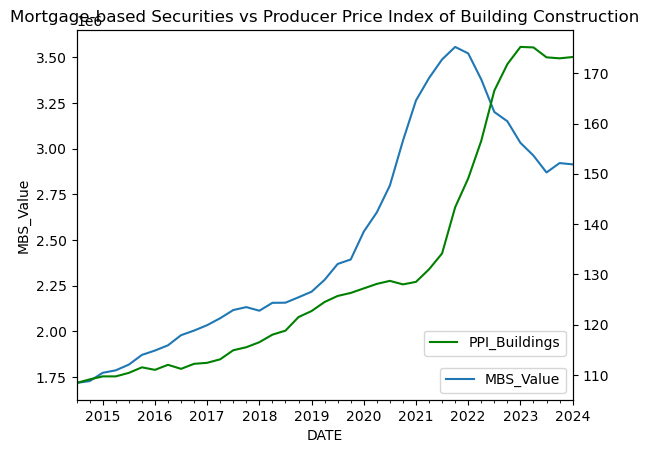

In [27]:
# Visualize data results on a graph
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()


# Plot the data
df2["2014-05-01":"2024-05-01"].plot(ax=ax1, y="MBS_Value", legend=True)
df2["2014-05-01":"2024-05-01"].plot(ax=ax2, y="PPI_Buildings", legend=True, color="g")

plt.title("Mortgage-based Securities vs Producer Price Index of Building Construction")

# We set the labels to the axes
ax1.set_ylabel("MBS_Value")
ax3.set_ylabel("PPI_Buildings")
ax3.spines["right"].set_position(("outward", 60))

# Set position of legends
ax1.legend(["MBS_Value"], loc="lower right")
ax2.legend(["PPI_Buildings"], loc="lower right", bbox_to_anchor=(1, 0.1))


plt.show()

From the figure above, both the MBS and PPI index move in an upward direction. This indicative of the fact that lending institution constantly explore novel credit enhancement schemes to hedge loan credit risk by harnessing Mortgage-Backed Securitization schemes. This is to ensure that there's enough capital to disburse loans and transfer credit risks to third-party investors. Borrowers (construction companies) are constantly hiking the prices of buildings to prevent risk of default and as well overcome the cost of market inflation.

## 3.4. Relationship Between Parameters

In [28]:
#Check correlation between Asset value and Debt-To-Income
correlation1 = df['Fin_Stat'].corr(df['DTI_ratio'])

correlation1.round(3)

0.588

A moderate positive correlation of 0.588 indicates loan refinancing/debt servicing is somewhat variable: Loan is only reffinanced  only when the borrower is financially capable to do so after receiving income.

In [29]:
#Check correlation between Asset value and Loan-To-Value ratio
correlation2 = df['Fin_Stat'].corr(df['LTV_ratio'])

correlation2.round(3)

-0.04

A negative correlation of -0.04 indicates that as assets value increase (i.e financial statement looks good). loan to value ratio decreases - which, perhaps, might improve credit ratings and worthiness of these real estate companies.

In [30]:
#Check correlation between Debt-To-Income and Loan-To-Value ratio
correlation3 = df['DTI_ratio'].corr(df['LTV_ratio'])

correlation3.round(3)

0.636

Ideally, the borrower's income determine how much of loan is refinanced, however, behavioural finance could affect this possibility.

In [31]:
#Check correlation between Default Rate and PPI of Construction materials
correlation4 = df2['MBS_Value'].corr(df2['PPI_Buildings'])

correlation4.round(3)

0.754

A correlation of 0.754 is an indication that as MBS asset value increases, PPI of building constructions also increases and vice-versa.

# Scenario 4: Publicly traded equity

In [32]:
# import relevant iibraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import yfinance as yfin
import math
import QuantLib as ql
from IPython.display import VimeoVideo
from scipy import stats
import pandas_datareader.data as web
import requests

## 4.1. Unadjusted vs Adjusted Data

To implement the exploratory statistics for this scenario, we aim to pull out 10-year unadjusted and adjusted stock data for  HDFC Bank in India to simply compare the opening and adjusted closing stock trend within this stipulated period. This is to show the stock performance within this period. The unadjusted stock data is represented by the Open, Low and High stock prices while the Adjusted stock data is represented by the Adjusted Closing stock price

In [33]:
# Get the data
hdfc_bank = yfin.download('HDFCBANK.NS', start='2014-05-01')[["Open","Low", "High","Adj Close"]]
hdfc_bank

[*********************100%%**********************]  1 of 1 completed


,Open,Low,High,Adj Close
Date,,,,
2014-05-02,361.750000,357.774994,363.774994,328.892151
2014-05-05,359.924988,357.000000,361.549988,328.708679
2014-05-06,360.100006,357.049988,362.299988,330.313995
2014-05-07,359.250000,355.725006,363.500000,328.204163
2014-05-08,358.575012,357.750000,361.500000,329.442535
...,...,...,...,...
2024-07-03,1791.000000,1764.650024,1794.000000,1768.650024
2024-07-04,1759.750000,1724.849976,1759.750000,1727.150024
2024-07-05,1685.000000,1642.199951,1685.000000,1648.099976


In [34]:
df = hdfc_bank
df

,Open,Low,High,Adj Close
Date,,,,
2014-05-02,361.750000,357.774994,363.774994,328.892151
2014-05-05,359.924988,357.000000,361.549988,328.708679
2014-05-06,360.100006,357.049988,362.299988,330.313995
2014-05-07,359.250000,355.725006,363.500000,328.204163
2014-05-08,358.575012,357.750000,361.500000,329.442535
...,...,...,...,...
2024-07-03,1791.000000,1764.650024,1794.000000,1768.650024
2024-07-04,1759.750000,1724.849976,1759.750000,1727.150024
2024-07-05,1685.000000,1642.199951,1685.000000,1648.099976


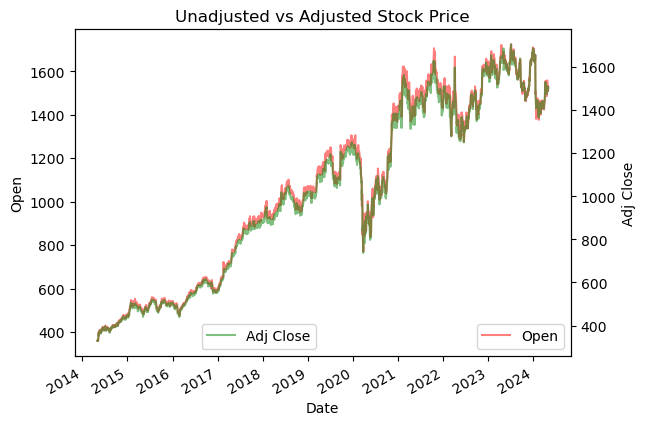

In [35]:
# Visualize data results on a graph
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
plt.rcParams["figure.figsize"] = (18, 20)



# Plot the data
df["2014-05-01":"2024-05-01"].plot(ax=ax1, y="Open", legend=True, alpha=0.5, color="r")
df["2014-05-01":"2024-05-01"].plot(ax=ax2, y="Adj Close", legend=True, alpha=0.5, color="g")
plt.title("Unadjusted vs Adjusted Stock Price")

# We set the labels to the axes
ax1.set_ylabel("Open")
ax2.set_ylabel("Adj Close")


# Set position of legends
ax1.legend(["Open"], loc="lower right")
ax2.legend(["Adj Close"], loc="lower right", bbox_to_anchor=(0.5, 0))
plt.show()

The figure above show that from 2014 to about 2020, the HDFC daily closing stock price always trended below the opening price indicating that going long on the stock on daily basis will most likely incur loses for the stock trader. However, there was a significant increase in the stock price within this period (2014 -2020). The stock experience a major dip in 2020 (most likely because of the COVID economic downturn). From then onwards, daily trend for closing stock improved.

## 4.2. Cash Flows

To further explain the improvement in the adjusted closing stock price, we went on to analyse the company's financial history. While Dividends data was unavailable for free on Yahoo finance, we decided to explore the Free Cash Flow data and compared its the Outstanding debt. 

In [36]:
hdfc = yfin.Ticker('HDFCBANK.NS')
hdfc_cf = hdfc.cashflow
hdfc_cf.head()

,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Free Cash Flow,433580300000.0,554693800000.0,903969700000.0,152885400000.0
Repayment Of Debt,-558113600000.0,-353325700000.0,-326285000000.0,-315209600000.0
Issuance Of Debt,1022933100000.0,722908900000.0,481989200000.0,272104700000.0
Issuance Of Capital Stock,NaN,NaN,0.0,0.0
Capital Expenditure,-43620300000.0,-26324400000.0,-17806500000.0,-18294300000.0


In [37]:
cash_flow = hdfc_cf.iloc[:2,:]
cash_flow

,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Free Cash Flow,433580300000.0,554693800000.0,903969700000.0,152885400000.0
Repayment Of Debt,-558113600000.0,-353325700000.0,-326285000000.0,-315209600000.0


In [38]:
cash_flow = cash_flow.T

cash_flow

,Free Cash Flow,Repayment Of Debt
2023-03-31,433580300000.0,-558113600000.0
2022-03-31,554693800000.0,-353325700000.0
2021-03-31,903969700000.0,-326285000000.0
2020-03-31,152885400000.0,-315209600000.0


In [39]:
df2 = cash_flow.rename(columns={"Free Cash Flow": "FCF","Repayment Of Debt" : "ROD"})

In [40]:
df2.head()

,FCF,ROD
2023-03-31,433580300000.0,-558113600000.0
2022-03-31,554693800000.0,-353325700000.0
2021-03-31,903969700000.0,-326285000000.0
2020-03-31,152885400000.0,-315209600000.0


In [41]:
df2['ROD'] *=-1

In [42]:
df2

,FCF,ROD
2023-03-31,433580300000.0,558113600000.0
2022-03-31,554693800000.0,353325700000.0
2021-03-31,903969700000.0,326285000000.0
2020-03-31,152885400000.0,315209600000.0


/var/folders/6l/vhkrzr4j4k3b90rgky33hvlw0000gn/T/ipykernel_34205/1688146416.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df2["2015-01-01":"2024-05-01"].plot(ax=ax1, y="FCF", legend=True, color="g")
/var/folders/6l/vhkrzr4j4k3b90rgky33hvlw0000gn/T/ipykernel_34205/1688146416.py:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df2["2015-01-01":"2024-05-01"].plot(ax=ax2, y="ROD", legend=True, color="r")


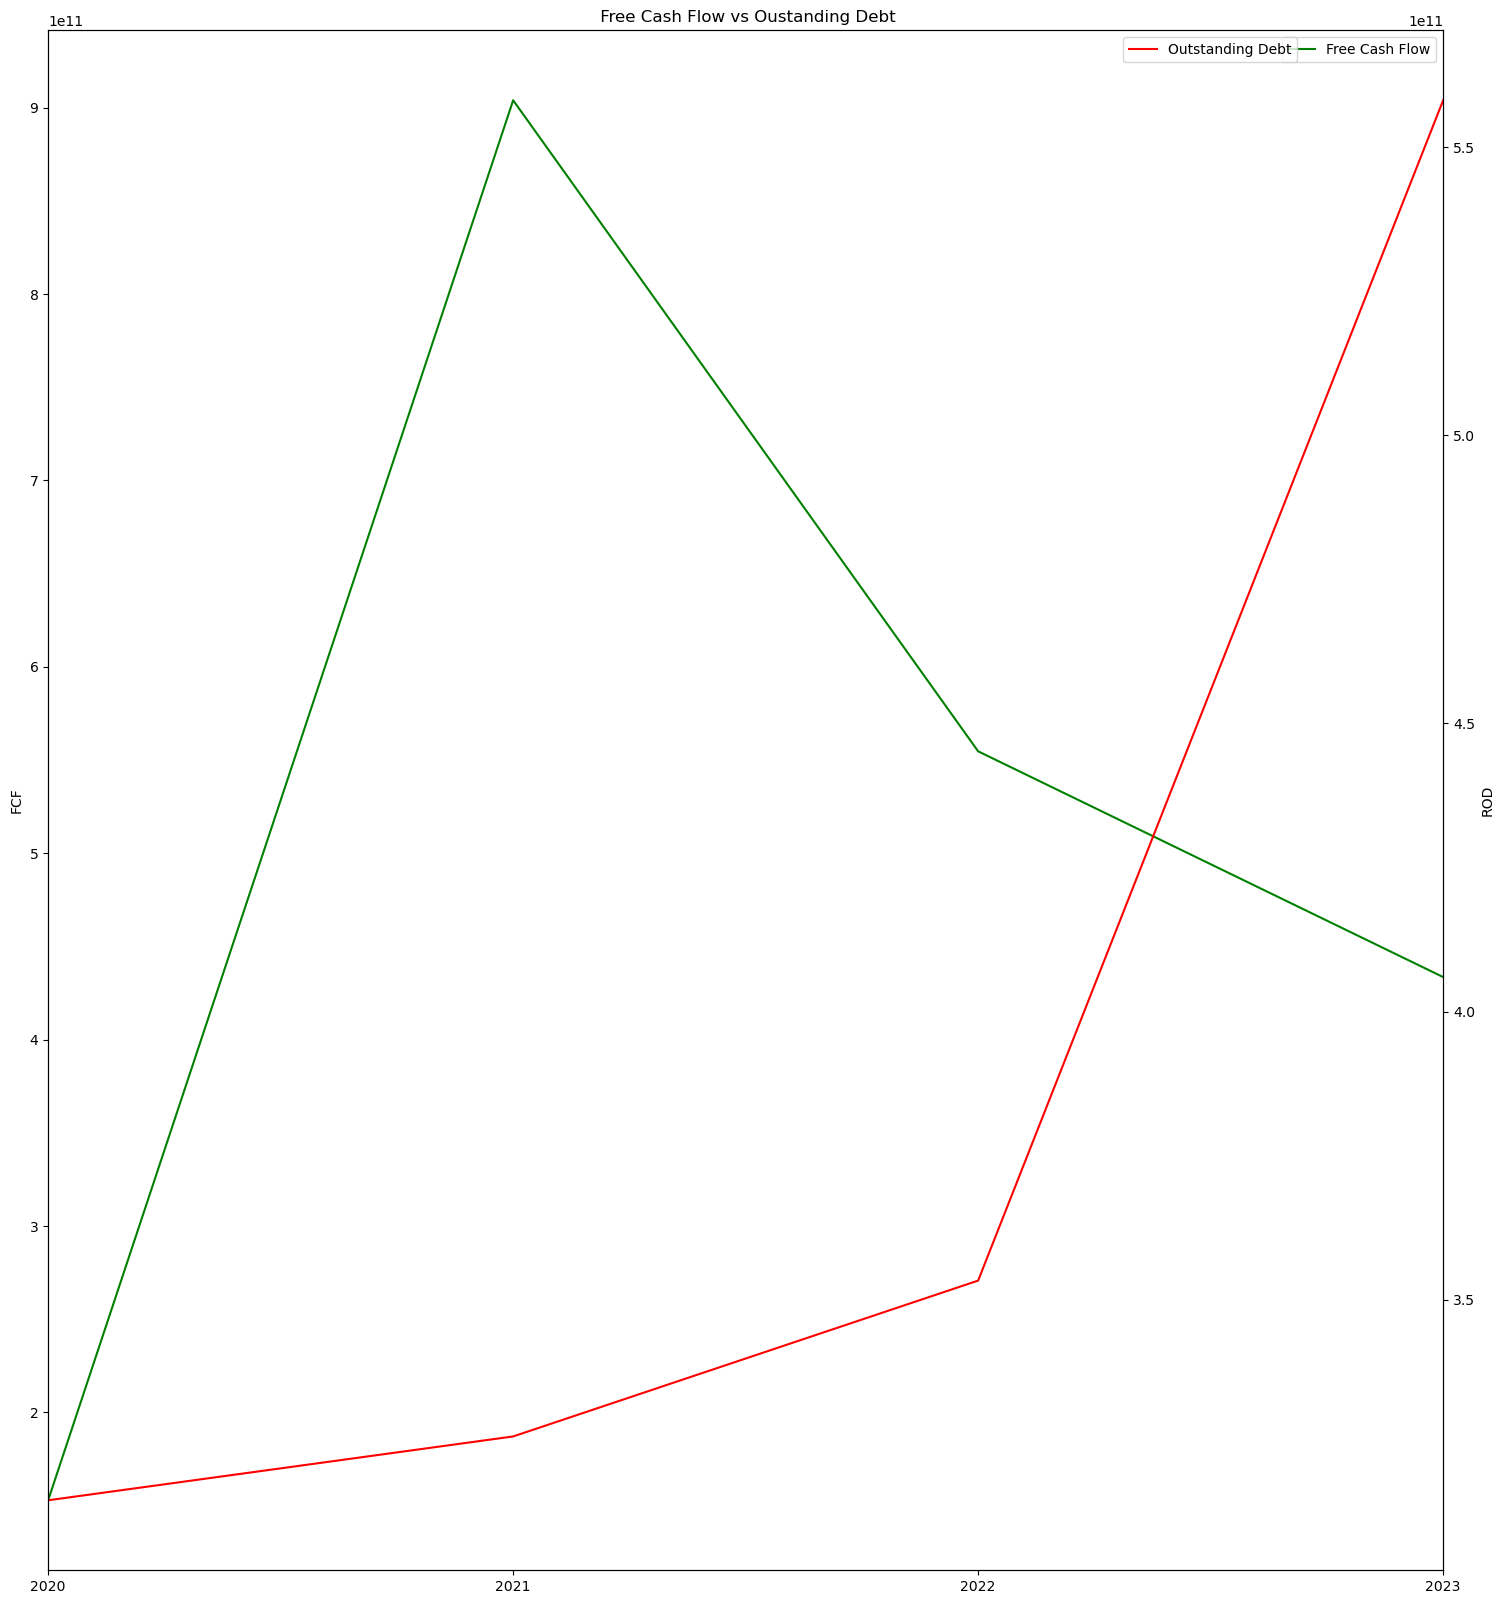

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()


# Plot the data
df2["2015-01-01":"2024-05-01"].plot(ax=ax1, y="FCF", legend=True, color="g")
df2["2015-01-01":"2024-05-01"].plot(ax=ax2, y="ROD", legend=True, color="r")
plt.title(" Free Cash Flow vs Oustanding Debt")

# We set the labels to the axes
ax1.set_ylabel("FCF")
ax2.set_ylabel("ROD")


# Set position of legends

ax1.legend(["Free Cash Flow"], loc="upper right")
ax2.legend(["Outstanding Debt"], loc="upper right", bbox_to_anchor=(0.9, 1))

plt.show()

The figure above depicts that bank began to record significant cashflows in March 2020. In 2021, cash flow dipped while outstanding debt increased a little.Further decline in cashflows was matched with corresponding increase outstanding debt. It therefore means that despite the upward movement of adjusted closing stock price after 2020, cashflows were insufficient enough to meet service debts. Additionally, there is a non-linear relationship between the cash flows and outstanding debt

## 4.3 Hedging with US Stocks

We then decided to compare HDFC bank stock with a US Tech Stck like Amazon over the same 10-year period, as well as find the correlation between the aforementioned assets.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


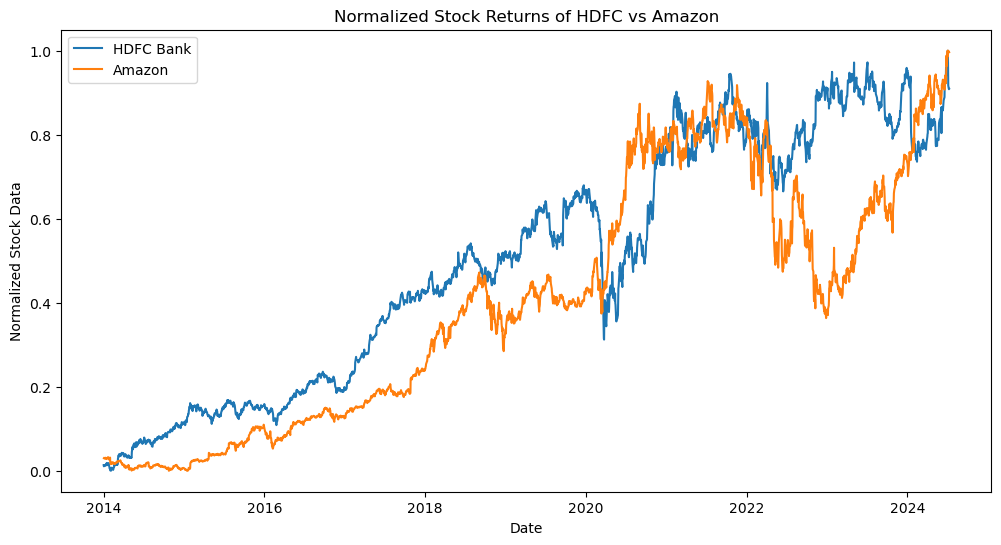

Correlation between HDFC Bank and Amazon: 0.8864451261101887


In [44]:
# Get the data
hdfc_bank = yfin.download('HDFCBANK.NS', start='2014-01-01')
amazon = yfin.download('AMZN', start='2014-01-01')

# Normalize
hdfc_bank_norm = (hdfc_bank['Close'] - hdfc_bank['Close'].min()) / (hdfc_bank['Close'].max() - hdfc_bank['Close'].min())
amazon_norm = (amazon['Close'] - amazon['Close'].min()) / (amazon['Close'].max() - amazon['Close'].min())

# Plot
plt.figure(figsize=(12, 6))

plt.plot(hdfc_bank_norm.index, hdfc_bank_norm, label='HDFC Bank')
plt.plot(amazon_norm.index, amazon_norm, label='Amazon')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Normalized Stock Data")
plt.title("Normalized Stock Returns of HDFC vs Amazon")
plt.show()

print(f"Correlation between HDFC Bank and Amazon: {hdfc_bank_norm.corr(amazon_norm)}")

In [45]:
hdfc_bank_norm.mean()

0.5026220121273526

In [46]:
amazon_norm.mean()

0.4017450333859119

The stock returns for HDFC bank way better than the Amazon stock (as indicated by their mean values). However, a high positive correlation of 0.886 indicates a strong relatiosnhip between both assets. US stock market will most likely influence the stock market in other countries like India.

# Scenario 5: Publicly traded bond

In [47]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
start_date= '2020-01-01'
five_year_yield = yf.download('^FVX', start=start_date)['Adj Close']
ten_year_yield = yf.download('^TNX', start=start_date)['Adj Close']
thirty_year_yield = yf.download('^TYX', start=start_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [49]:
def bond_price(maturity, yield_to_maturity, face_value=100, coupon_rate=0.1, ):
    periods = np.arange(1, maturity + 1)
    coupon_payment = coupon_rate * face_value
    pv_coupons = coupon_payment / (1 + yield_to_maturity)**periods
    pv_face_value = face_value / (1 + yield_to_maturity)**maturity
    price = np.sum(pv_coupons) + pv_face_value
    return price

five_year_price = [bond_price(maturity = 5, yield_to_maturity=y) for y in five_year_yield]
ten_year_price = [bond_price(maturity = 10, yield_to_maturity=y) for y in ten_year_yield]
thirty_year_price = [bond_price(maturity = 20, yield_to_maturity=y) for y in thirty_year_yield]

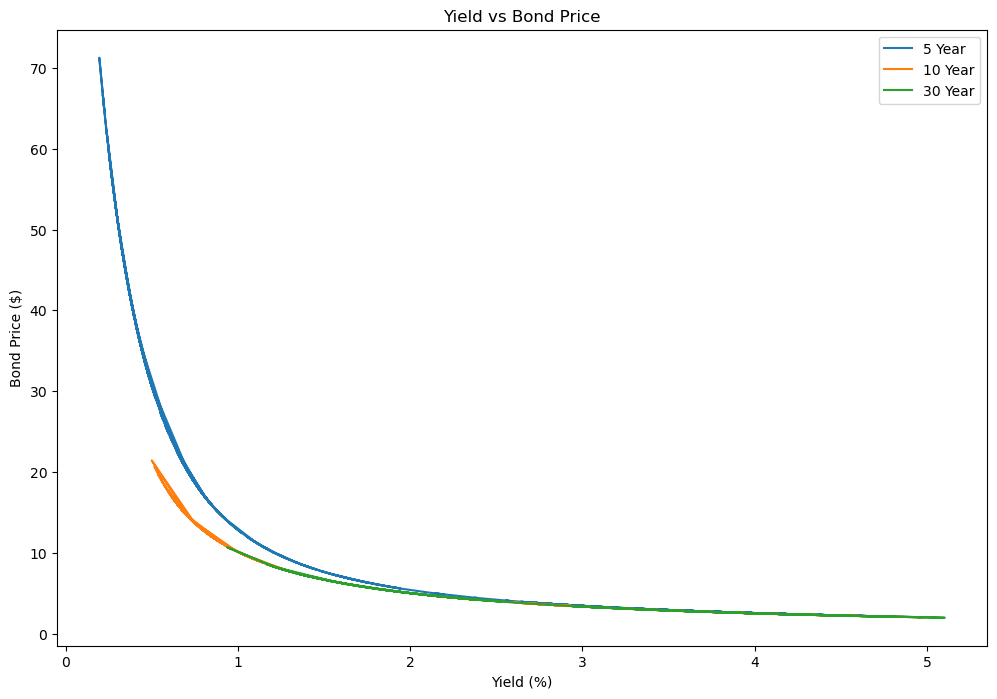

In [50]:
# Plot the results
plt.figure(figsize=(12, 8))

# Plot yield data vs bond price
plt.plot(five_year_yield, five_year_price, label='5 Year')
plt.plot(ten_year_yield, ten_year_price, label='10 Year')
plt.plot(thirty_year_yield, thirty_year_price, label='30 Year')
plt.xlabel('Yield (%)')
plt.ylabel('Bond Price ($)')
plt.title('Yield vs Bond Price')
plt.legend()
plt.show()

# Scenario 6: An illiquid security

In [51]:
apikey="nRHiTd6IbjtsZlRBpx6dblgZM36dImyR"

In [52]:
url = "https://financialmodelingprep.com/api/v3/ratios/{}?limit=40&apikey=nRHiTd6IbjtsZlRBpx6dblgZM36dImyR".format

In [53]:
from urllib.request import urlopen
import json
def get_jsonparsed_data(url):
    """ Receive the content of ``url``, parse it as JSON and return the object. Parameters ---------- url : str Returns ------- dict """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    
    return json.loads(data)

Ratios_APPL = get_jsonparsed_data(url("AAPL"))

In [54]:
import pandas as pd

large_cap_stocks =['AXP', 'CVX', 'CSCO', 'JNJ', 'JPM', 'MSFT', 'CRM', 'TRV', 'WMT']
small_cap_stocks = ['GTLS', 'LNW', 'TLYS', 'WK']

# debt ratio
large_cap_debt_ratio = []
for stock in large_cap_stocks:
    ratio_data = get_jsonparsed_data(url(stock))
    debt_ratio = ratio_data[0]['debtRatio']
    large_cap_debt_ratio.append(debt_ratio)
small_cap_debt_ratio = []
for stock in small_cap_stocks:
    ratio_data = get_jsonparsed_data(url(stock))
    debt_ratio = ratio_data[0]['debtRatio']
    small_cap_debt_ratio.append(debt_ratio)

large_cap_volume = []
for stock in large_cap_stocks:
    stock_data = yf.download(stock, start=start_date)
    volume = stock_data['Volume'].mean()
    large_cap_volume.append(volume)

small_cap_volume = []
for stock in small_cap_stocks:
    stock_data = yf.download(stock, start=start_date)
    volume = stock_data['Volume'].mean()
    small_cap_volume.append(volume)

df = pd.DataFrame({
  'Stock': large_cap_stocks + small_cap_stocks,
  'Type': ['Large Cap'] * len(large_cap_stocks) + ['Small Cap'] * len(small_cap_stocks),
  'Debt Ratio': large_cap_debt_ratio + small_cap_debt_ratio,
  'Volume': large_cap_volume + small_cap_volume
})
final=df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [55]:
final

,Stock,Type,Debt Ratio,Volume
0,AXP,Large Cap,0.188271,3.771658e+06
1,CVX,Large Cap,0.083323,1.017037e+07
2,CSCO,Large Cap,0.082384,2.088484e+07
3,JNJ,Large Cap,0.175056,8.279766e+06
4,JPM,Large Cap,0.112643,1.358625e+07
5,MSFT,Large Cap,0.145555,2.950849e+07
6,CRM,Large Cap,0.100344,6.955555e+06
7,TRV,Large Cap,0.068993,1.429927e+06
8,WMT,Large Cap,0.169054,2.307886e+07
9,GTLS,Small Cap,0.423339,5.338335e+05


In [56]:
final["Volatility"] = 0
start_date= '2020-01-01'
for i,row in final.iterrows():
    stock_data = yf.download(row["Stock"], start=start_date)
    final.loc[i, "Volatility"] = stock_data["Adj Close"].pct_change().std()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


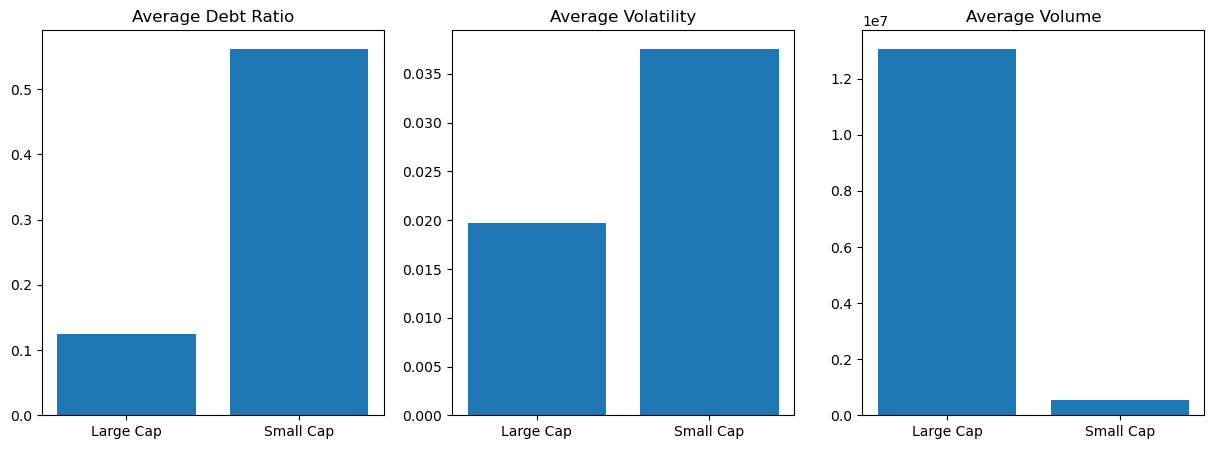

In [57]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(['Large Cap', 'Small Cap'], [final[final['Type'] == 'Large Cap']['Debt Ratio'].mean(), final[final['Type'] == 'Small Cap']['Debt Ratio'].mean()])
axes[0].set_title('Average Debt Ratio')

axes[1].bar(['Large Cap', 'Small Cap'], [final[final['Type'] == 'Large Cap']['Volatility'].mean(), final[final['Type'] == 'Small Cap']['Volatility'].mean()])
axes[1].set_title('Average Volatility')

axes[2].bar(['Large Cap', 'Small Cap'], [final[final['Type'] == 'Large Cap']['Volume'].mean(), final[final['Type'] == 'Small Cap']['Volume'].mean()])
axes[2].set_title('Average Volume')

plt.show()